In [4]:
#!pip install statsmodels matplotlib

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

import itertools
import warnings
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.sm_exceptions import ConvergenceWarning

In [8]:
# Load the dataset
df = pd.read_csv('monthly-beer-production-in-austr.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Split the data into train and test sets
train = df[:-12]
test = df[-12:]

# Define and fit the SARIMAX model
# Note: Adjust the order and seasonal_order parameters as needed based on your dataset

In [9]:
# Define the parameter ranges to search
p = d = q = range(0, 3)  # AR, differencing, and MA components.
seasonal_p = seasonal_d = seasonal_q = range(0, 3)  # Seasonal components
s = 12  # Seasonal period

# Generate all different combinations of p, d, q and seasonal p, d, q
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], s) for x in list(itertools.product(seasonal_p, seasonal_d, seasonal_q))]

# Suppress warnings related to convergence issues
warnings.simplefilter('ignore', ConvergenceWarning)

best_aic = float("inf")
best_pdq = None
best_seasonal_pdq = None

# Grid search
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = SARIMAX(train,
                            order=param,
                            seasonal_order=param_seasonal,
                            enforce_stationarity=False,
                            enforce_invertibility=False)
            results = model.fit(disp=False)
            
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
                
        except Exception as e:
            continue

print(f"Best SARIMAX{best_pdq}x{best_seasonal_pdq} model - AIC:{best_aic}")

C:\softwares\python-3.11.4\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\softwares\python-3.11.4\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\softwares\python-3.11.4\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\softwares\python-3.11.4\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\softwares\python-3.11.4\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will b

Best SARIMAX(1, 1, 2)x(0, 2, 2, 12) model - AIC:3132.816797356235


In [11]:
model = SARIMAX(train, order=(1, 1, 2), seasonal_order=(0, 2, 2, 12))
model_fit = model.fit(disp=False)

# Make predictions
predictions = model_fit.forecast(steps=12)
predictions = pd.Series(predictions, index=test.index)

C:\softwares\python-3.11.4\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\softwares\python-3.11.4\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\softwares\python-3.11.4\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RMSE: 11.250796486135348
MAE: 9.798469837460695


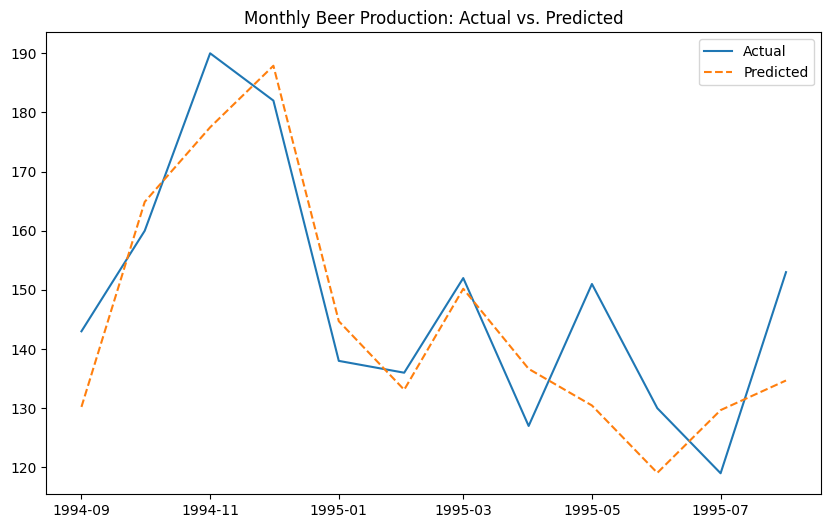

In [12]:
# Calculate RMSE and MAE
rmse = sqrt(mean_squared_error(test, predictions))
mae = mean_absolute_error(test, predictions)
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(test, label='Actual')
plt.plot(predictions, label='Predicted', linestyle='--')
plt.title('Monthly Beer Production: Actual vs. Predicted')
plt.legend()
plt.show()